# Numerical solution to the 1-dimensional Time Independent Schroedinger Equation
Based on the paper "Matrix Numerov method for solving Schroedinger's equation" by Mohandas Pillai, Joshua Goglio, and Thad G. Walker, _American Journal of Physics_ **80** (11), 1017 (2012).  [doi:10.1119/1.4748813](http://dx.doi.org/10.1119/1.4748813)


In [2]:
# import some needed libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [3]:
autoscale = False # set this equal to true to use Pillai's recommended step sizes

In [4]:
# values of constants
hbar = 1.0
mass = 1.0 # changing the mass will also change the energy scale
omega = 1.0
L = 1.0 # width of SW

In [5]:
# bounds (These are overwritten if autoscale=True)
xmin = -L # lower bound of position
xmax = 5.0 # upper bound of position
n = 100 # number of steps (may be overwritten if autoscale == True)
dx = (xmax-xmin)/(n-1)

In [6]:
# the function V is the potential energy function
def V(x):
    # make sure there is no division by zero
    # this also needs to be a "vectorizable" function
    # uncomment one of the examples below, or write your own.
    return 0.5*mass*omega**2*x*x*(0.5*(x+np.abs(x))) # half harmonic oscillator
    

In [7]:
if (autoscale): 
    #Emax is the maximum energy for which to check for eigenvalues
    Emax = 20.0
    #The next lines make some reasonable choices for the position grid size and spacing
    xt = opt.brentq(lambda x: V(x)-Emax ,0,5*Emax) #classical turning point
    dx = 1.0/np.sqrt(2*Emax) #step size
    # bounds and number of steps
    n = np.int(0.5+2*(xt/dx + 4.0*np.pi)) #number of steps
    xmin = -dx*(n+1)/2 
    xmax = dx*(n+1)/2

In [8]:
xmin, xmax, n #show the limits and number of steps

(-1.0, 5.0, 100)

In [9]:
#define the x coordinates
x = np.linspace(xmin,xmax,n)

In [10]:
#define the numerov matrices
B = np.matrix((np.eye(n,k=-1)+10.0*np.eye(n,k=0)+np.eye(n,k=1))/12.0)
A = np.matrix((np.eye(n,k=-1)-2.0*np.eye(n,k=0)+np.eye(n,k=1))/(dx**2))

In [11]:
#calculate kinetic energy operator using Numerov's approximation
KE = -0.5*hbar**2/mass*B.I*A

In [12]:
#calculate hamiltonian operator approximation
H = KE + np.diag(V(x))

In [13]:
#Calculate eigenvalues and eigenvectors of H
energies, wavefunctions = np.linalg.eigh(H) # "wavefunctions" is a matrix with one eigenvector in each column.

In [14]:
energies #display the lowest four energies

array([7.10735429e-01, 2.44793378e+00, 4.66094134e+00, 7.19409154e+00,
       9.97194310e+00, 1.29506895e+01, 1.61007572e+01, 1.94005951e+01,
       2.28337663e+01, 2.63873183e+01, 3.00507692e+01, 3.38154563e+01,
       3.76741891e+01, 4.16214523e+01, 4.56551780e+01, 4.97820871e+01,
       5.40266780e+01, 5.84352685e+01, 6.30632495e+01, 6.79535858e+01,
       7.31276932e+01, 7.85909345e+01, 8.43410662e+01, 9.03734416e+01,
       9.66831887e+01, 1.03265872e+02, 1.10117579e+02, 1.17234829e+02,
       1.24614451e+02, 1.32253474e+02, 1.40149028e+02, 1.48298274e+02,
       1.56698342e+02, 1.65346279e+02, 1.74239008e+02, 1.83373290e+02,
       1.92745698e+02, 2.02352582e+02, 2.12190045e+02, 2.22253919e+02,
       2.32539743e+02, 2.43042734e+02, 2.53757775e+02, 2.64679388e+02,
       2.75801713e+02, 2.87118493e+02, 2.98623051e+02, 3.10308272e+02,
       3.22166586e+02, 3.34189950e+02, 3.46369830e+02, 3.58697190e+02,
       3.71162469e+02, 3.83755578e+02, 3.96465878e+02, 4.09282176e+02,
      

In [24]:
# extract color settings to help plotting
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

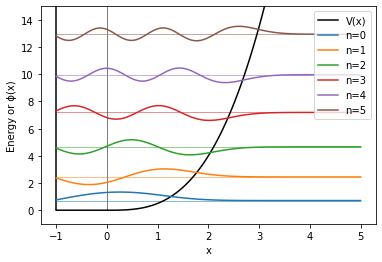

In [25]:
number = [0,1,2,3,4,5] #which wavefunctions to plot, starting counting from zero
zoom = -3.0 # zoom factor for wavefunctions to make them more visible
plt.plot(x,V(x),'-k',label="V(x)") # plot the potential
plt.vlines(-1,0,15,color="black")
plt.vlines(0,0,15,color="black",lw=0.5)
for num in number:
    plt.plot(x,zoom*wavefunctions[:,num]+energies[num],label="n={}".format(num)) #plot the num-th wavefunction
    plt.hlines(energies[num],-1,5,lw=0.5, color=colors[num])
plt.ylim(-1,15); # set limits of vertical axis for plot
plt.legend();
plt.xlabel("x");
plt.ylabel("Energy or ϕ(x)");